# Выбор локации для скважины

## Загрузка и подготовка данных

### Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display 
from scipy.stats import spearmanr

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (15,10)

### Загрузка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(geo_data_0)
display(geo_data_1)
display(geo_data_2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [4]:
display(geo_data_0.info())
display(geo_data_1.info())
display(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display('geo_data_0:', geo_data_0.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)
display('geo_data_1:', geo_data_1.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)
display('geo_data_2:', geo_data_2.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)

'geo_data_0:'

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.940431,-0.072580,0.502360,1.073581,1.939265,2.082334,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.514661,-0.200881,0.250252,0.700646,1.015524,1.121338,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,-2.862016,0.287748,2.515969,4.715088,7.840264,9.969349,16.003790
product,100000.0,92.500000,44.288691,0.000000,24.019137,56.497507,91.849972,128.564089,161.206333,180.351516,185.364347


'geo_data_1:'

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
f0,100000.0,1.141296,8.965932,-31.609576,-12.706888,-6.298551,1.153055,8.621015,15.024181,18.863531,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-13.190846,-8.267985,-4.813172,-1.332816,3.667425,7.139352,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,-0.002644,1.000021,2.011479,3.999904,5.002640,5.007810,5.019721
product,100000.0,68.825000,45.944423,0.000000,0.000000,26.953261,57.085625,107.813044,137.945408,137.945408,137.945408


'geo_data_2:'

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
f0,100000.0,0.002023,1.732045,-8.760004,-2.847974,-1.162288,0.009424,1.158535,2.851247,4.057783,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-2.836316,-1.174820,-0.009482,1.163678,2.845834,4.020189,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,-3.193020,0.130359,2.484236,4.858794,8.227100,10.511973,16.739402
product,100000.0,95.000000,44.749921,0.000000,24.678170,59.450441,94.925613,130.595027,165.665158,184.995815,190.029838


Типы данных и наименования указаны верно, при первом осмотре ошибок не обнаружил.

### Предобработка данных

#### Пропуски

In [6]:
display('Пропуски geo_data_0:', geo_data_0.isna().sum())
display('Пропуски geo_data_1:',geo_data_0.isna().sum())
display('Пропуски geo_data_2:', geo_data_0.isna().sum())

'Пропуски geo_data_0:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Пропуски geo_data_1:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Пропуски geo_data_2:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

#### Дубликаты

In [7]:
display('Дубликаты geo_data_0:', geo_data_0.duplicated().sum())
display('Дубликаты geo_data_1:', geo_data_1.duplicated().sum())
display('Дубликаты geo_data_2:', geo_data_2.duplicated().sum())

'Дубликаты geo_data_0:'

0

'Дубликаты geo_data_1:'

0

'Дубликаты geo_data_2:'

0

дубликатов не обнаружено

In [8]:
geo_data_0.nunique()
display('Уникальные значения в geo_data_0:', geo_data_0.nunique())
display('Уникальные значения в geo_data_1:', geo_data_1.nunique())
display('Уникальные значения в geo_data_2:', geo_data_2.nunique())

'Уникальные значения в geo_data_0:'

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

'Уникальные значения в geo_data_1:'

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

'Уникальные значения в geo_data_2:'

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

In [9]:
geo_data_1['product'].unique()

array([  3.17910258,  26.95326103, 134.76630516, 137.94540774,
        84.03888568, 110.99214671,  53.90652206,   0.        ,
       107.81304413,  57.08562465,  30.13236361,  80.85978309])

In [10]:
geo_data_1.query('product < 1')

,id,f0,f1,f2,product
11,OXyvW,16.320755,-0.562946,-0.001783,0.0
13,igmai,6.695604,-0.749449,-0.007630,0.0
62,Qjy5w,21.418478,-5.134490,-0.002836,0.0
63,G6WCj,6.822701,3.104979,-0.000723,0.0
77,MzQhL,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...,...
99936,YrRU8,5.085749,-3.980305,0.005063,0.0
99948,Jbnur,8.277805,-9.178818,0.003275,0.0
99956,aV1cJ,13.343983,-1.290200,0.005980,0.0
99961,Zjbn2,13.854163,-11.528089,-0.005556,0.0


In [11]:
x= 100000/8235
print(f'{x:.2f}%')

12.14%


в geo_data_1 в продуктах более 12% значений ровны 0

#### Выбросы

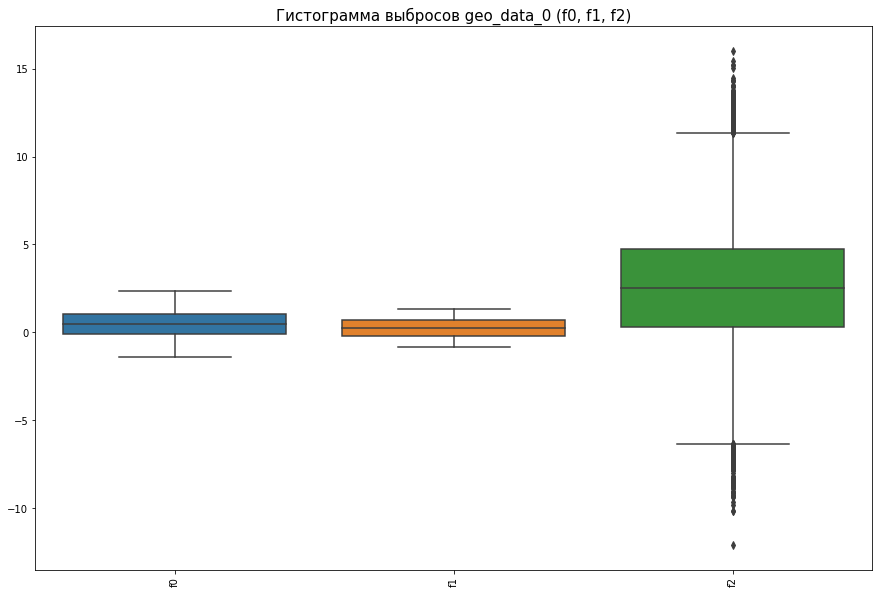

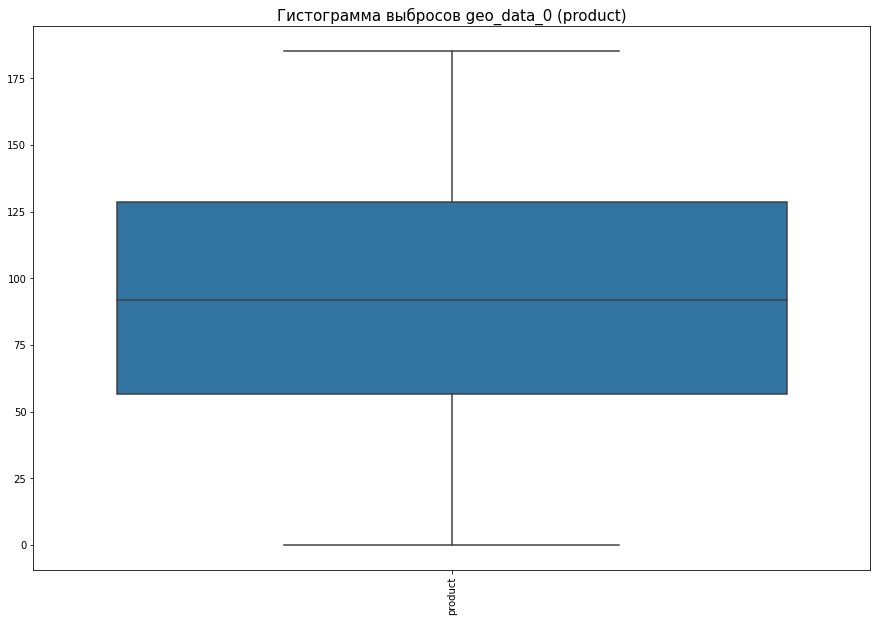

In [12]:
ax = sns.boxplot(data=geo_data_0.iloc[:,1:4])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов geo_data_0 (f0, f1, f2)', size=15)
plt.show()
ax = sns.boxplot(data=geo_data_0.iloc[:,4:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов geo_data_0 (product)', size=15)
plt.show()

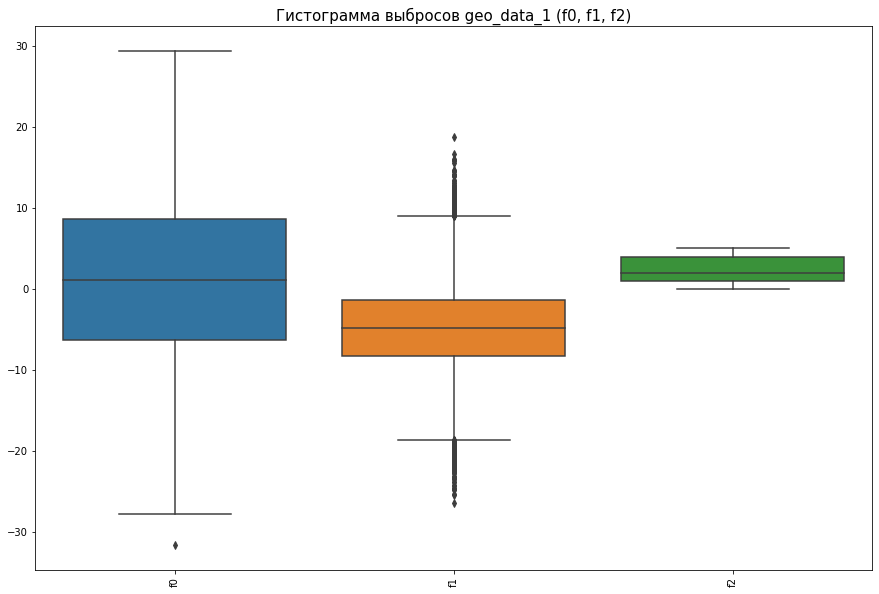

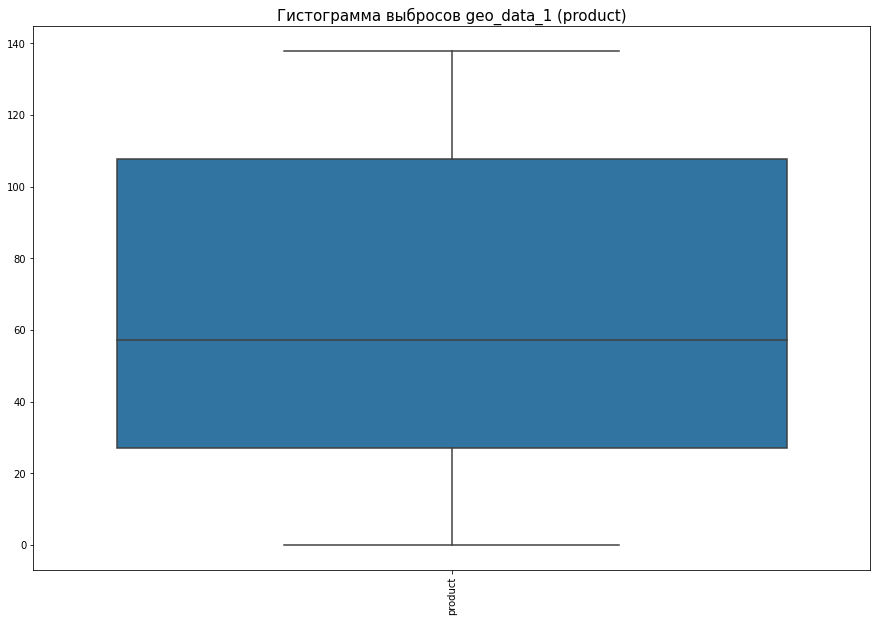

In [13]:
ax = sns.boxplot(data=geo_data_1.iloc[:,1:4])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов geo_data_1 (f0, f1, f2)', size=15)
plt.show()
ax = sns.boxplot(data=geo_data_1.iloc[:,4:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов geo_data_1 (product)', size=15)
plt.show()

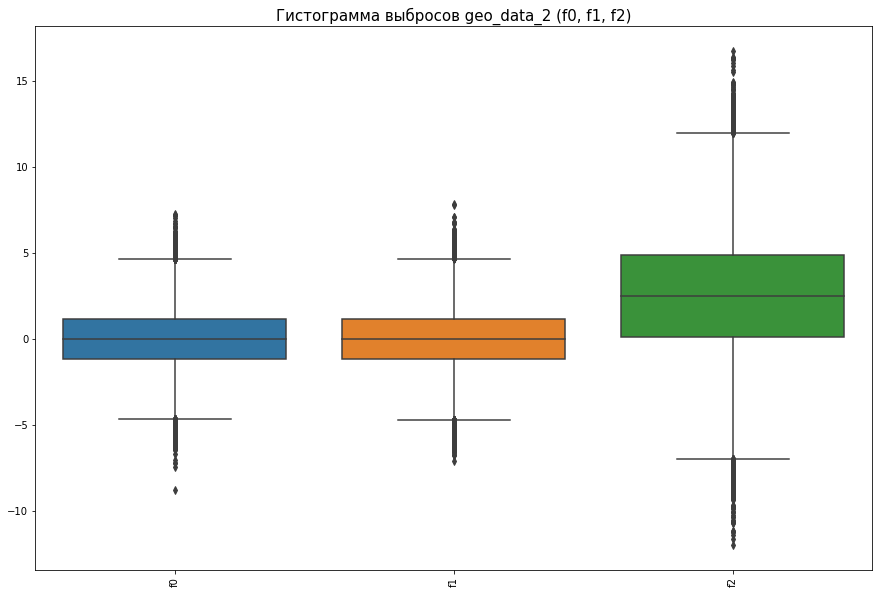

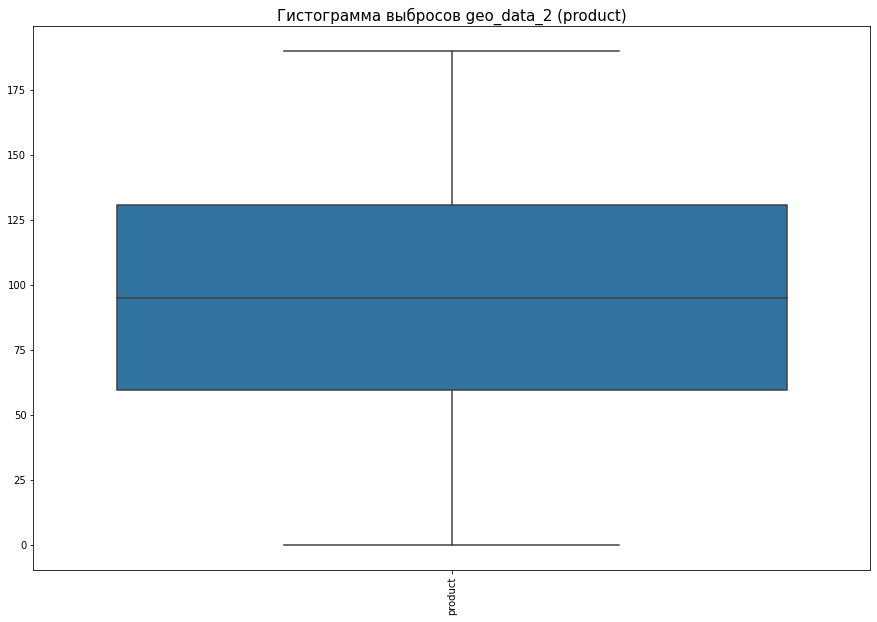

In [14]:
ax = sns.boxplot(data=geo_data_2.iloc[:,1:4])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов geo_data_2 (f0, f1, f2)', size=15)
plt.show()
ax = sns.boxplot(data=geo_data_2.iloc[:,4:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов geo_data_2 (product)', size=15)
plt.show()

небольшие выбросы в geo_data_0 (колонка f2), geo_data_1 (колонка f1), geo_data_2 (во всех колонках)

#### Исследовательский анализ данных

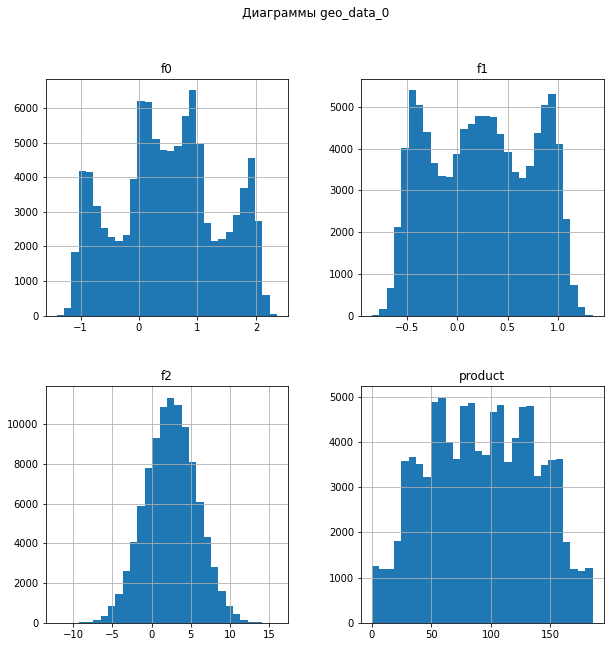

In [15]:
geo_data_0.iloc[:,1:].hist(figsize=(10, 10), bins=30)
plt.suptitle("Диаграммы geo_data_0");

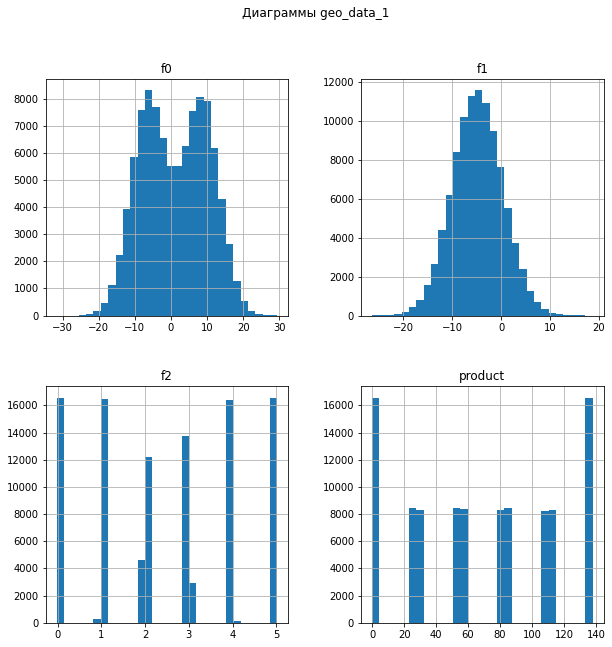

In [16]:
geo_data_1.iloc[:,1:].hist(figsize=(10, 10), bins=30)
plt.suptitle("Диаграммы geo_data_1");

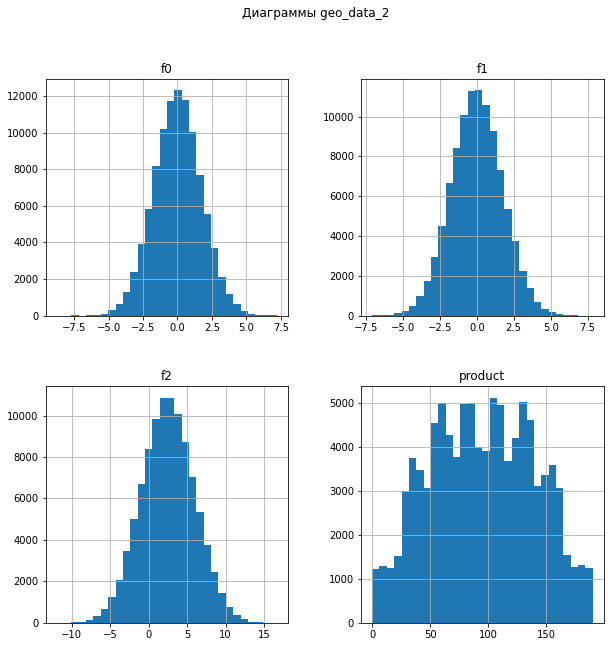

In [17]:
geo_data_2.iloc[:,1:].hist(figsize=(10, 10), bins=30)
plt.suptitle("Диаграммы geo_data_2");

#### Корелляция

In [18]:
# скорей всего она тут и не нужна, данные синтетические 

In [19]:
geo_data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [20]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [21]:
geo_data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Выводы:
* Типы данных и наименования, во всех датафреймах, указаны верно;
* Пропусков, дубликатов не обнаружено;
* В geo_data_1 в продуктах более 12% значений ровны 0;
* Сильная корелляция у продукта с f2, особенно в geo_data_1;
* Выбросы. В geo_data_0 присутствуют значения, выше средних в колонке f2. В geo_data_1 присутствуют значения, выше средних в колонке f1. В geo_data_2 присутствуют значения, выше средних в колонках f1, f2, f3. Product во всех трёх датасетах в пределах нормы.

## Обучение и проверка модели

In [22]:
RANDOM_STATE = 42

Функция для разбития на тренировочную и валидационную выборки

In [23]:
def split_data(data):
    future = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    future_train, future_valid, target_train, target_valid = train_test_split(future, target, test_size=0.25, random_state=RANDOM_STATE, shuffle = True)
    return future_train, future_valid, target_train, target_valid

Разбиваем датасеты на тренировочную и валидационную выборки

In [24]:
future_train_0, future_valid_0, target_train_0, target_valid_0 = split_data(geo_data_0)
future_train_1, future_valid_1, target_train_1, target_valid_1 = split_data(geo_data_1)
future_train_2, future_valid_2, target_train_2, target_valid_2 = split_data(geo_data_2)

Обучим модель линейной регрессии

In [25]:
lr = LinearRegression()

In [26]:
def model_lr(future_train, future_valid, target_train, target_valid):
    lr.fit(future_train, target_train)
    predicted_valid = lr.predict(future_valid)
    
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    mean_sum = predicted_valid.sum()/len(predicted_valid)
    return mse, rmse, mean_sum, predicted_valid

In [27]:
mse_0, rmse_0, mean_sum_0, predicted_valid_0 = model_lr(future_train_0, future_valid_0, target_train_0, target_valid_0)
mse_1, rmse_1, mean_sum_1, predicted_valid_1 = model_lr(future_train_1, future_valid_1, target_train_1, target_valid_1)
mse_2, rmse_2, mean_sum_2, predicted_valid_2 = model_lr(future_train_2, future_valid_2, target_train_2, target_valid_2)

In [28]:
print(f'Регион geo_data_0: метрика MSE составляет {mse_0:.2f}, метрика RMSE составляет {rmse_0:.2f}, Средний запас сырья {mean_sum_0:.2f}')
print(f'Регион geo_data_1: метрика MSE составляет {mse_1:.2f}, метрика RMSE составляет {rmse_1:.2f}, Средний запас сырья {mean_sum_1:.2f}')
print(f'Регион geo_data_2: метрика MSE составляет {mse_2:.2f}, метрика RMSE составляет {rmse_2:.2f}, Средний запас сырья {mean_sum_2:.2f}')

Регион geo_data_0: метрика MSE составляет 1425.56, метрика RMSE составляет 37.76, Средний запас сырья 92.40
Регион geo_data_1: метрика MSE составляет 0.79, метрика RMSE составляет 0.89, Средний запас сырья 68.71
Регион geo_data_2: метрика MSE составляет 1611.69, метрика RMSE составляет 40.15, Средний запас сырья 94.77


Вывод: лучше всего данные по geo_data_1, скорей всего из-за высокой корелляции между f2 и product

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. \
Бюджет на разработку скважин в регионе — 10 млрд рублей. \
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### Объём сырья для бузубыточной разработки месторождения

In [29]:
money = 10000000000
money_barrel = 450000
well = 200
well_max = 500
PRODUCT_UNITS_INCOME_RUB = 450 * 10**3

In [30]:
raw_materials = money/money_barrel/well 
print(f'Объём сырья для безубыточной разработки новой скважины: {raw_materials:.2f} баррель')

Объём сырья для безубыточной разработки новой скважины: 111.11 баррель


In [31]:
print(f'Объём сырья для безубыточной разработки новой скважины в geo_data_0: {mean_sum_0 - raw_materials:.2f} баррель')
print(f'Объём сырья для безубыточной разработки новой скважины в geo_data_1: {mean_sum_1 - raw_materials:.2f} баррель')
print(f'Объём сырья для безубыточной разработки новой скважины в geo_data_2: {mean_sum_2 - raw_materials:.2f} баррель')

Объём сырья для безубыточной разработки новой скважины в geo_data_0: -18.71 баррель
Объём сырья для безубыточной разработки новой скважины в geo_data_1: -42.40 баррель
Объём сырья для безубыточной разработки новой скважины в geo_data_2: -16.34 баррель


In [32]:
geo_data_0_good_product = ((geo_data_0.iloc[:,4:].query('product > 112').count())/len(geo_data_0)).to_list()
geo_data_1_good_product = ((geo_data_1.iloc[:,4:].query('product > 112').count())/len(geo_data_1)).to_list()
geo_data_2_good_product = ((geo_data_2.iloc[:,4:].query('product > 112').count())/len(geo_data_2)).to_list()

display(geo_data_0_good_product)
display(geo_data_1_good_product)
display(geo_data_2_good_product)

[0.35901]

[0.16537]

[0.37491]

Вывод: Объём сырья для безубыточной разработки новой скважины равен чуть больше 111 баррелей, все локации не дотягивают до необходимых значений, больше всех в geo_data_1 \
geo_data_0 содержит 35.9% скважин с запасами нефти более 111 тысяч баррель. \
geo_data_1 содержит 16.5% скважин с запасами нефти более 111 тысяч баррель. \
geo_data_2 содержит 37.4% скважин с запасами нефти более 111 тысяч баррель.

## Расчёт прибыли и рисков 

приведем целевые и прогнозные значения по всем регионам к одному типу

In [33]:
def series_type(target, predicted):
    target = target.reset_index(drop=True)
    predicted = pd.Series(predicted)
    return target, predicted

In [34]:
target_valid_0, predicted_valid_0 = series_type(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series_type(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series_type(target_valid_2, predicted_valid_2)

Функция подсчета прибыли для выбранных скважин.

In [35]:
def revenue(target, predictions, cost, count):
    probs_sorted = predictions.sort_values(ascending=False)
    deposits = target[probs_sorted.index][:count]
    return cost * deposits.sum() - money

Функция, в которой сгенерируем 1000 выборок, чтобы найти распределение прибыли

In [36]:
def bootstrap(target, predictions):
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        some_target = target.sample(n = well_max, replace = True, random_state = state)
        some_predictions = predictions[some_target.index]

        values.append(revenue(some_target, some_predictions, money_barrel, well))

    values = pd.Series(values)
    values_mean = round(int(values.mean()),2)
    lower = values.quantile(q=0.025)
    upper = values.quantile(q=0.975)
    risk = int(len(values[values <0]) / len(values)*100)
    return values_mean, lower, upper, risk

In [37]:
values_mean_0, lower_0, upper_0, risk_0 = bootstrap(target_valid_0, predicted_valid_0)
values_mean_1, lower_1, upper_1, risk_1 = bootstrap(target_valid_1, predicted_valid_1)
values_mean_2, lower_2, upper_2, risk_2 = bootstrap(target_valid_2, predicted_valid_2)

In [38]:
print('Средняя прибыль лучших месторождений geo_data_0 равна:', values_mean_0)
print('Средняя прибыль лучших месторождений geo_data_1 равна:', values_mean_1)
print('Средняя прибыль лучших месторождений geo_data_2 равна:', values_mean_2)

Средняя прибыль лучших месторождений geo_data_0 равна: 435933772
Средняя прибыль лучших месторождений geo_data_1 равна: 489661254
Средняя прибыль лучших месторождений geo_data_2 равна: 403687927


In [39]:
print(f'95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_0: {round(lower_0,2)} - {round(upper_0,2)}')
print(f'95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_1: {round(lower_1,2)} - {round(upper_1,2)}')
print(f'95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_2: {round(lower_2,2)} - {round(upper_2,2)}')

95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_0: -116231612.78 - 966504180.71
95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_1: 55116177.27 - 905762650.42
95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_2: -153116984.76 - 952887416.71


In [40]:
print(f'Риск убытков geo_data_0 равен: {risk_0}%')
print(f'Риск убытков geo_data_1 равен: {risk_1}%')
print(f'Риск убытков geo_data_2 равен: {risk_2}%')

Риск убытков geo_data_0 равен: 6%
Риск убытков geo_data_1 равен: 1%
Риск убытков geo_data_2 равен: 7%


## Вывод

В рамках исследований трёх месторождений для добычи полезных ископаемых была проведена работу по подготовке данных: \ 
проверены все входные данные и признаки, изучены пропуски, дубликаты и уникальные значения - особых проблем выявленно не было.
* Присутствуют небольшие выбросы в geo_data_0 (колонка f2), geo_data_1 (колонка f1), geo_data_2 (во всех колонках).
* Корелляция показала сильную зависимость в таблице geo_data_1 между product и f2

Построили модель линейной регрессии, целевым признаком выбрали Product. Метрики для анализа выбрали RMSE (среднеквадратическая ошибка) и MSE(среднеквадратическая ошибка), получились следующие данные:
* Регион geo_data_0: метрика MSE составляет 1425.56, метрика RMSE составляет 37.76, Средний запас сырья 92.40
* Регион geo_data_1: метрика MSE составляет 0.79, метрика RMSE составляет 0.89, Средний запас сырья 68.71
* Регион geo_data_2: метрика MSE составляет 1611.69, метрика RMSE составляет 40.15, Средний запас сырья 94.77 \
Лучше всего получились данные по geo_data_1

Расчитали объём сырья для безубыточной разработки новой скважины, он составил 111.11 тысяч баррель
* Объём сырья для безубыточной разработки новой скважины в geo_data_0: -18.71 баррель
* Объём сырья для безубыточной разработки новой скважины в geo_data_1: -42.40 баррель
* Объём сырья для безубыточной разработки новой скважины в geo_data_2: -16.34 баррель
* geo_data_0 содержит 35.9% скважин с запасами нефти более 111 тысяч баррель. 
* geo_data_1 содержит 16.5% скважин с запасами нефти более 111 тысяч баррель. 
* geo_data_2 содержит 37.4% скважин с запасами нефти более 111 тысяч баррель.

Написали функцию для подсчета прибыли для выбранных скважин(revenue). \

Посчитайли риски и прибыль для каждого региона
* Средняя прибыль лучших месторождений geo_data_0 равна: 435933772
* Средняя прибыль лучших месторождений geo_data_1 равна: 489661254
* Средняя прибыль лучших месторождений geo_data_2 равна: 403687927


* 95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_0: -116231612.78 - 966504180.71
* 95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_1: 55116177.27 - 905762650.42
* 95% доверительный интервал для средней прибыли 200 лучших месторождений geo_data_2: -153116984.76 - 952887416.71


* Риск убытков geo_data_0 равен: 6%
* Риск убытков geo_data_1 равен: 1%
* Риск убытков geo_data_2 равен: 7%


Делая общий вывод можно выделить регион geo_data_1, он имеет самую высокую средную прибыль (489661254), меньше всех риск убытков (1%), а так же самый низний разброс в доверительном интервале.